**imports**

In [1]:
import fnmatch # this will be used to identify all output csv files
import os
import pandas as pd                    
import seaborn as sns                  
import matplotlib.pyplot as plt
import time

start_time = time.time()


In [2]:
# General settings

directory = '../experiment/' # directory of the csv files (output of the model)

# formatting data types and visualisations
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.5,style="white")



In [3]:
# Filtering relevant files

def get_files(pattern):

    pattern = pattern
    files_list = []
    
    for file in os.listdir(directory):
        if fnmatch.fnmatch(file, pattern):
            files_list.append(file)
    
    return (files_list)


In [4]:
# Reading each file

def read_files(file_list):

    file_list = file_list
    appended_data = pd.DataFrame()

    for elem in file_list:
        file_path = os.path.join(directory,elem)
        df = pd.read_csv(file_path,index_col=[0])
        df['Path'] = df[['Created at', 'Removed at']].agg('-'.join, axis=1) # adding Path column
        df['Scenario_prev'] = [i.split('_replication_', 1)[0] for i in file_list][0] # adding scenario column
        df['Replication'] = file_list.index(elem) # adding replication column
        appended_data = appended_data.append(df,ignore_index = True)
        #appended_data = appended_data.reset_index()
    
    return(appended_data)
    

In [5]:
# Reading each file

def read_files_waiting_time (file_list):

    file_list = file_list
    appended_data = pd.DataFrame()

    for elem in file_list:
        file_path = os.path.join(directory,elem)
        df = pd.read_csv(file_path,index_col=[0])
        appended_data = appended_data.append(df,ignore_index = True)
        #appended_data = appended_data.reset_index()
    
    return(appended_data)

In [6]:
# Getting all BCS files

# For every scenario, we call the 'get_files' function to append all the replication files in a list
BCSscore_x1_001_x2_1 = get_files('*BCSscore_10.01_replication*_travel_time.csv')

# Then we pass that list to the 'read_files' function to get all the data, add the columns for the scenario, path and replication and save to a dataframe
BCSscore_df1=read_files(BCSscore_x1_001_x2_1)

BCSscore_x1_01_x2_1 = get_files('*BCSscore_10.1_replication*_travel_time.csv')
BCSscore_df2=read_files(BCSscore_x1_01_x2_1)

BCSscore_x1_005_x2_1 = get_files('*BCSscore_10.05_replication*_travel_time.csv')
BCSscore_df3=read_files(BCSscore_x1_005_x2_1)

BCSscore_x1_001_x2_2 = get_files('*BCSscore_20.01_replication*_travel_time.csv')
BCSscore_df4=read_files(BCSscore_x1_001_x2_2)

BCSscore_x1_01_x2_2 = get_files('*BCSscore_20.1_replication*_travel_time.csv')
BCSscore_df5=read_files(BCSscore_x1_01_x2_2)

BCSscore_x1_005_x2_2 = get_files('*BCSscore_20.05_replication*_travel_time.csv')
BCSscore_df6=read_files(BCSscore_x1_005_x2_2)

BCSscore_x1_001_x2_5 = get_files('*BCSscore_50.01_replication*_travel_time.csv')
BCSscore_df7=read_files(BCSscore_x1_001_x2_5)

BCSscore_x1_01_x2_5 = get_files('*BCSscore_50.1_replication*_travel_time.csv')
BCSscore_df8=read_files(BCSscore_x1_01_x2_5)

BCSscore_x1_005_x2_5 = get_files('*BCSscore_50.05_replication*_travel_time.csv')
BCSscore_df9=read_files(BCSscore_x1_005_x2_5)

BCSscore_x1_001_x2_10 = get_files('*BCSscore_100.01_replication*_travel_time.csv')
BCSscore_df10=read_files(BCSscore_x1_001_x2_10)

BCSscore_x1_01_x2_10 = get_files('*BCSscore_100.1_replication*_travel_time.csv')
BCSscore_df11=read_files(BCSscore_x1_01_x2_10)

BCSscore_x1_005_x2_10 = get_files('*BCSscore_100.05_replication*_travel_time.csv')
BCSscore_df12=read_files(BCSscore_x1_005_x2_10)

BCSscore_x1_0_x2_1 = get_files('*BCSscore_replication*_travel_time.csv')
BCSscore_df13=read_files(BCSscore_x1_0_x2_1)



# Appending everything together
BCSscore_final_df = BCSscore_df1.append([BCSscore_df2,BCSscore_df3,BCSscore_df4,BCSscore_df5,BCSscore_df6,BCSscore_df7,BCSscore_df8,BCSscore_df9,BCSscore_df10,BCSscore_df11,BCSscore_df12,BCSscore_df13])

# Making some corrections to the dataframe
BCSscore_final_df['Scenario'] = BCSscore_final_df["Scenario_prev"].str.split('scenario_').str[1]
BCSscore_final_df = BCSscore_final_df.drop(["Scenario_prev"], axis = 'columns')
BCSscore_final_df


,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus15410,10,0.00,N2_LRPS,N1_LRPS,MiniBus,N2_LRPS-N1_LRPS,0,BCSscore_10.01
1,SmallTruck15456,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCSscore_10.01
2,SmallTruck15472,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCSscore_10.01
3,SmallTruck15386,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,BCSscore_10.01
4,MediumTruck15512,5,0.00,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,BCSscore_10.01
...,...,...,...,...,...,...,...,...,...
16095,HeavyTruck22277,238,0.00,N102_LRPE,N104_LRPE,HeavyTruck,N102_LRPE-N104_LRPE,9,BCSscore
16096,SmallTruck22907,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,9,BCSscore
16097,MediumTruck21907,354,0.00,N2_LRPE,N2_LRPS,MediumTruck,N2_LRPE-N2_LRPS,9,BCSscore
16098,HeavyTruck22780,84,0.00,N207_LRPS,N207_LRPE,HeavyTruck,N207_LRPS-N207_LRPE,9,BCSscore


In [7]:
# Getting all Cyclone files

# For every scenario, we call the 'get_files' function to append all the replication files in a list
Cyclone_x1_001_x2_1 = get_files('*Cyclone_10.01_replication*_travel_time.csv')

# Then we pass that list to the 'read_files' function to get all the data, add the columns for the scenario, path and replication and save to a dataframe
Cyclone_df1=read_files(Cyclone_x1_001_x2_1)

Cyclone_x1_01_x2_1 = get_files('*Cyclone_10.1_replication*_travel_time.csv')
Cyclone_df2=read_files(Cyclone_x1_01_x2_1)

Cyclone_x1_005_x2_1 = get_files('*Cyclone_10.05_replication*_travel_time.csv')
Cyclone_df3=read_files(Cyclone_x1_005_x2_1)

Cyclone_x1_001_x2_2 = get_files('*Cyclone_20.01_replication*_travel_time.csv')
Cyclone_df4=read_files(Cyclone_x1_001_x2_2)

Cyclone_x1_01_x2_2 = get_files('*Cyclone_20.1_replication*_travel_time.csv')
Cyclone_df5=read_files(Cyclone_x1_01_x2_2)

Cyclone_x1_005_x2_2 = get_files('*Cyclone_20.05_replication*_travel_time.csv')
Cyclone_df6=read_files(Cyclone_x1_005_x2_2)

Cyclone_x1_001_x2_5 = get_files('*Cyclone_50.01_replication*_travel_time.csv')
Cyclone_df7=read_files(Cyclone_x1_001_x2_5)

Cyclone_x1_01_x2_5 = get_files('*Cyclone_50.1_replication*_travel_time.csv')
Cyclone_df8=read_files(Cyclone_x1_01_x2_5)

Cyclone_x1_005_x2_5 = get_files('*Cyclone_50.05_replication*_travel_time.csv')
Cyclone_df9=read_files(Cyclone_x1_005_x2_5)

Cyclone_x1_001_x2_10 = get_files('*Cyclone_100.01_replication*_travel_time.csv')
Cyclone_df10=read_files(Cyclone_x1_001_x2_10)

Cyclone_x1_01_x2_10 = get_files('*Cyclone_100.1_replication*_travel_time.csv')
Cyclone_df11=read_files(Cyclone_x1_01_x2_10)

Cyclone_x1_005_x2_10 = get_files('*Cyclone_100.05_replication*_travel_time.csv')
Cyclone_df12=read_files(Cyclone_x1_005_x2_10)

Cyclone_x1_0_x2_1 = get_files('*Cyclone_replication*_travel_time.csv')
Cyclone_df13=read_files(Cyclone_x1_0_x2_1)


# Appending everything together
Cyclone_final_df = Cyclone_df1.append([Cyclone_df2,Cyclone_df3,Cyclone_df4,Cyclone_df5,Cyclone_df6,Cyclone_df7,Cyclone_df8,Cyclone_df9,Cyclone_df10,Cyclone_df11,Cyclone_df12,Cyclone_df13])

# Making some corrections to the dataframe
Cyclone_final_df['Scenario'] = Cyclone_final_df["Scenario_prev"].str.split('scenario_').str[1]
Cyclone_final_df = Cyclone_final_df.drop(["Scenario_prev"], axis = 'columns')
Cyclone_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus7680,10,0.00,N1_LRPS,N2_LRPS,MiniBus,N1_LRPS-N2_LRPS,0,Cyclone_10.01
1,SmallTruck7714,5,0.16,N2_LRPS,N105_LRPS,SmallTruck,N2_LRPS-N105_LRPS,0,Cyclone_10.01
2,MediumTruck7730,6,1.17,N2_LRPS,N105_LRPS,MediumTruck,N2_LRPS-N105_LRPS,0,Cyclone_10.01
3,MediumTruck7784,5,0.46,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Cyclone_10.01
4,SmallTruck7691,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,0,Cyclone_10.01
...,...,...,...,...,...,...,...,...,...
15992,LargeBus21639,438,102.40,N104_LRPE,N204_LRPS,LargeBus,N104_LRPE-N204_LRPS,9,Cyclone
15993,SmallTruck22906,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,9,Cyclone
15994,SmallTruck22907,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,9,Cyclone
15995,MiniBus22923,39,0.00,N204_LRPE,N204_LRPS,MiniBus,N204_LRPE-N204_LRPS,9,Cyclone


In [8]:
# Getting all Earthquake files

# For every scenario, we call the 'get_files' function to append all the replication files in a list
Earthquake_x1_001_x2_1 = get_files('*Earthquake_10.01_replication*_travel_time.csv')

# Then we pass that list to the 'read_files' function to get all the data, add the columns for the scenario, path and replication and save to a dataframe
Earthquake_df1=read_files(Earthquake_x1_001_x2_1)

Earthquake_x1_01_x2_1 = get_files('*Earthquake_10.1_replication*_travel_time.csv')
Earthquake_df2=read_files(Earthquake_x1_01_x2_1)

Earthquake_x1_005_x2_1 = get_files('*Earthquake_10.05_replication*_travel_time.csv')
Earthquake_df3=read_files(Earthquake_x1_005_x2_1)

Earthquake_x1_001_x2_2 = get_files('*Earthquake_20.01_replication*_travel_time.csv')
Earthquake_df4=read_files(Earthquake_x1_001_x2_2)

Earthquake_x1_01_x2_2 = get_files('*Earthquake_20.1_replication*_travel_time.csv')
Earthquake_df5=read_files(Earthquake_x1_01_x2_2)

Earthquake_x1_005_x2_2 = get_files('*Earthquake_20.05_replication*_travel_time.csv')
Earthquake_df6=read_files(Earthquake_x1_005_x2_2)

Earthquake_x1_001_x2_5 = get_files('*Earthquake_50.01_replication*_travel_time.csv')
Earthquake_df7=read_files(Earthquake_x1_001_x2_5)

Earthquake_x1_01_x2_5 = get_files('*Earthquake_50.1_replication*_travel_time.csv')
Earthquake_df8=read_files(Earthquake_x1_01_x2_5)

Earthquake_x1_005_x2_5 = get_files('*Earthquake_50.05_replication*_travel_time.csv')
Earthquake_df9=read_files(Earthquake_x1_005_x2_5)

Earthquake_x1_001_x2_10 = get_files('*Earthquake_100.01_replication*_travel_time.csv')
Earthquake_df10=read_files(Earthquake_x1_001_x2_10)

Earthquake_x1_01_x2_10 = get_files('*Earthquake_100.1_replication*_travel_time.csv')
Earthquake_df11=read_files(Earthquake_x1_01_x2_10)

Earthquake_x1_005_x2_10 = get_files('*Earthquake_100.05_replication*_travel_time.csv')
Earthquake_df12=read_files(Earthquake_x1_005_x2_10)

Earthquake_x1_0_x2_1 = get_files('*Earthquake_replication*_travel_time.csv')
Earthquake_df13=read_files(Earthquake_x1_0_x2_1)


# Appending everything together
Earthquake_final_df = Earthquake_df1.append([Earthquake_df2,Earthquake_df3,Earthquake_df4,Earthquake_df5,Earthquake_df6,Earthquake_df7,Earthquake_df8,Earthquake_df9,Earthquake_df10,Earthquake_df11,Earthquake_df12,Earthquake_df13])

# Making some corrections to the dataframe
Earthquake_final_df['Scenario'] = Earthquake_final_df["Scenario_prev"].str.split('scenario_').str[1]
Earthquake_final_df = Earthquake_final_df.drop(["Scenario_prev"], axis = 'columns')
Earthquake_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus2,4,0.00,N2_LRPS,N105_LRPS,MiniBus,N2_LRPS-N105_LRPS,0,Earthquake_10.01
1,LargeBus48,10,0.00,N1_LRPS,N2_LRPS,LargeBus,N1_LRPS-N2_LRPS,0,Earthquake_10.01
2,MediumTruck104,5,0.00,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Earthquake_10.01
3,SmallTruck10,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,Earthquake_10.01
4,MediumTruck11,43,0.00,N204_LRPE,N204_LRPS,MediumTruck,N204_LRPE-N204_LRPS,0,Earthquake_10.01
...,...,...,...,...,...,...,...,...,...
16060,SmallTruck22907,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,9,Earthquake
16061,MediumTruck22107,294,105.18,N204_LRPE,N105_LRPS,MediumTruck,N204_LRPE-N105_LRPS,9,Earthquake
16062,SmallTruck22780,84,0.00,N207_LRPS,N207_LRPE,SmallTruck,N207_LRPS-N207_LRPE,9,Earthquake
16063,MediumTruck22781,84,0.00,N207_LRPE,N207_LRPS,MediumTruck,N207_LRPE-N207_LRPS,9,Earthquake


In [9]:
# Getting all Erosion files

# For every scenario, we call the 'get_files' function to append all the replication files in a list
Erosion_x1_001_x2_1 = get_files('*Erosion_10.01_replication*_travel_time.csv')

# Then we pass that list to the 'read_files' function to get all the data, add the columns for the scenario, path and replication and save to a dataframe
Erosion_df1=read_files(Erosion_x1_001_x2_1)

Erosion_x1_01_x2_1 = get_files('*Erosion_10.1_replication*_travel_time.csv')
Erosion_df2=read_files(Erosion_x1_01_x2_1)

Erosion_x1_005_x2_1 = get_files('*Erosion_10.05_replication*_travel_time.csv')
Erosion_df3=read_files(Erosion_x1_005_x2_1)

Erosion_x1_001_x2_2 = get_files('*Erosion_20.01_replication*_travel_time.csv')
Erosion_df4=read_files(Erosion_x1_001_x2_2)

Erosion_x1_01_x2_2 = get_files('*Erosion_20.1_replication*_travel_time.csv')
Erosion_df5=read_files(Erosion_x1_01_x2_2)

Erosion_x1_005_x2_2 = get_files('*Erosion_20.05_replication*_travel_time.csv')
Erosion_df6=read_files(Erosion_x1_005_x2_2)

Erosion_x1_001_x2_5 = get_files('*Erosion_50.01_replication*_travel_time.csv')
Erosion_df7=read_files(Erosion_x1_001_x2_5)

Erosion_x1_01_x2_5 = get_files('*Erosion_50.1_replication*_travel_time.csv')
Erosion_df8=read_files(Erosion_x1_01_x2_5)

Erosion_x1_005_x2_5 = get_files('*Erosion_50.05_replication*_travel_time.csv')
Erosion_df9=read_files(Erosion_x1_005_x2_5)

Erosion_x1_001_x2_10 = get_files('*Erosion_100.01_replication*_travel_time.csv')
Erosion_df10=read_files(Erosion_x1_001_x2_10)

Erosion_x1_01_x2_10 = get_files('*Erosion_100.1_replication*_travel_time.csv')
Erosion_df11=read_files(Erosion_x1_01_x2_10)

Erosion_x1_005_x2_10 = get_files('*Erosion_100.05_replication*_travel_time.csv')
Erosion_df12=read_files(Erosion_x1_005_x2_10)

Erosion_x1_0_x2_1 = get_files('*Erosion_replication*_travel_time.csv')
Erosion_df13=read_files(Erosion_x1_0_x2_1)


# Appending everything together
Erosion_final_df = Erosion_df1.append([Erosion_df2,Erosion_df3,Erosion_df4,Erosion_df5,Erosion_df6,Erosion_df7,Erosion_df8,Erosion_df9,Erosion_df10,Erosion_df11,Erosion_df12,Erosion_df13])

# Making some corrections to the dataframe
Erosion_final_df['Scenario'] = Erosion_final_df["Scenario_prev"].str.split('scenario_').str[1]
Erosion_final_df = Erosion_final_df.drop(["Scenario_prev"], axis = 'columns')
Erosion_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MediumTruck3906,5,0.00,N2_LRPS,N105_LRPS,MediumTruck,N2_LRPS-N105_LRPS,0,Erosion_10.01
1,MediumTruck3904,15,0.00,N1_LRPS,N105_LRPS,MediumTruck,N1_LRPS-N105_LRPS,0,Erosion_10.01
2,MiniBus3866,34,0.00,N204_LRPS,N207_LRPS,MiniBus,N204_LRPS-N207_LRPS,0,Erosion_10.01
3,LargeBus3954,4,0.00,N2_LRPS,N105_LRPS,LargeBus,N2_LRPS-N105_LRPS,0,Erosion_10.01
4,SmallTruck3850,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,Erosion_10.01
...,...,...,...,...,...,...,...,...,...
15862,MediumTruck45749,102,0.00,N102_LRPE,N102_LRPS,MediumTruck,N102_LRPE-N102_LRPS,9,Erosion
15863,MediumTruck45647,138,0.00,N208_LRPE,N204_LRPS,MediumTruck,N208_LRPE-N204_LRPS,9,Erosion
15864,MediumTruck45946,43,0.00,N204_LRPS,N204_LRPE,MediumTruck,N204_LRPS-N204_LRPE,9,Erosion
15865,MiniBus45520,174,0.00,N1_LRPS,N207_LRPS,MiniBus,N1_LRPS-N207_LRPS,9,Erosion


In [10]:
# Getting all Flood files

# For every scenario, we call the 'get_files' function to append all the replication files in a list
Flood_x1_001_x2_1 = get_files('*Flood_10.01_replication*_travel_time.csv')

# Then we pass that list to the 'read_files' function to get all the data, add the columns for the scenario, path and replication and save to a dataframe
Flood_df1=read_files(Flood_x1_001_x2_1)

Flood_x1_01_x2_1 = get_files('*Flood_10.1_replication*_travel_time.csv')
Flood_df2=read_files(Flood_x1_01_x2_1)

Flood_x1_005_x2_1 = get_files('*Flood_10.05_replication*_travel_time.csv')
Flood_df3=read_files(Flood_x1_005_x2_1)

Flood_x1_001_x2_2 = get_files('*Flood_20.01_replication*_travel_time.csv')
Flood_df4=read_files(Flood_x1_001_x2_2)

Flood_x1_01_x2_2 = get_files('*Flood_20.1_replication*_travel_time.csv')
Flood_df5=read_files(Flood_x1_01_x2_2)

Flood_x1_005_x2_2 = get_files('*Flood_20.05_replication*_travel_time.csv')
Flood_df6=read_files(Flood_x1_005_x2_2)

Flood_x1_001_x2_5 = get_files('*Flood_50.01_replication*_travel_time.csv')
Flood_df7=read_files(Flood_x1_001_x2_5)

Flood_x1_01_x2_5 = get_files('*Flood_50.1_replication*_travel_time.csv')
Flood_df8=read_files(Flood_x1_01_x2_5)

Flood_x1_005_x2_5 = get_files('*Flood_50.05_replication*_travel_time.csv')
Flood_df9=read_files(Flood_x1_005_x2_5)

Flood_x1_001_x2_10 = get_files('*Flood_100.01_replication*_travel_time.csv')
Flood_df10=read_files(Flood_x1_001_x2_10)

Flood_x1_01_x2_10 = get_files('*Flood_100.1_replication*_travel_time.csv')
Flood_df11=read_files(Flood_x1_01_x2_10)

Flood_x1_005_x2_10 = get_files('*Flood_100.05_replication*_travel_time.csv')
Flood_df12=read_files(Flood_x1_005_x2_10)

Flood_x1_0_x2_1 = get_files('*Flood_replication*_travel_time.csv')
Flood_df13=read_files(Flood_x1_0_x2_1)

# Appending everything together
Flood_final_df = Flood_df1.append([Flood_df2,Flood_df3,Flood_df4,Flood_df5,Flood_df6,Flood_df7,Flood_df8,Flood_df9,Flood_df10,Flood_df11,Flood_df12,Flood_df13])

# Making some corrections to the dataframe
Flood_final_df['Scenario'] = Flood_final_df["Scenario_prev"].str.split('scenario_').str[1]
Flood_final_df = Flood_final_df.drop(["Scenario_prev"], axis = 'columns')
Flood_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MediumTruck11592,5,0.16,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Flood_10.01
1,MediumTruck11608,5,0.18,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Flood_10.01
2,MediumTruck11584,16,0.36,N1_LRPS,N105_LRPS,MediumTruck,N1_LRPS-N105_LRPS,0,Flood_10.01
3,MediumTruck11530,43,0.00,N204_LRPS,N204_LRPE,MediumTruck,N204_LRPS-N204_LRPE,0,Flood_10.01
4,SmallTruck11531,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,0,Flood_10.01
...,...,...,...,...,...,...,...,...,...
16085,HeavyTruck44946,353,0.00,N2_LRPS,N2_LRPE,HeavyTruck,N2_LRPS-N2_LRPE,9,Flood
16086,MediumTruck45367,223,0.00,N104_LRPE,N105_LRPS,MediumTruck,N104_LRPE-N105_LRPS,9,Flood
16087,SmallTruck44790,404,0.00,N104_LRPS,N207_LRPE,SmallTruck,N104_LRPS-N207_LRPE,9,Flood
16088,MediumTruck45820,84,0.00,N207_LRPS,N207_LRPE,MediumTruck,N207_LRPS-N207_LRPE,9,Flood


In [11]:
# checking the shape of the dataframes

print("BCSscore dataframe: ", BCSscore_final_df.shape)
print("Cyclone dataframe: ", Cyclone_final_df.shape)
print("Earthquake dataframe: ", Earthquake_final_df.shape)
print("Erosion dataframe: ", Erosion_final_df.shape)
print("Flood dataframe: ", Flood_final_df.shape)

BCSscore dataframe:  (34197, 9)
Cyclone dataframe:  (33948, 9)
Earthquake dataframe:  (34088, 9)
Erosion dataframe:  (33871, 9)
Flood dataframe:  (34079, 9)


In [12]:
# checking the number of possible paths in each dataframe

print("BCSscore dataframe paths: ", BCSscore_final_df['Path'].nunique())
print("Cyclone dataframe: ", Cyclone_final_df['Path'].nunique())
print("Earthquake dataframe paths: ", Earthquake_final_df['Path'].nunique())
print("Erosion dataframe paths: ", Erosion_final_df['Path'].nunique())
print("Flood dataframe paths: ", Flood_final_df['Path'].nunique())

BCSscore dataframe paths:  229
Cyclone dataframe:  229
Earthquake dataframe paths:  228
Erosion dataframe paths:  228
Flood dataframe paths:  229


In [13]:
# Appending all dataframes together

All_natural_hazards_df = BCSscore_final_df.append([Cyclone_final_df,Earthquake_final_df,Erosion_final_df,Flood_final_df])
All_natural_hazards_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus15410,10,0.00,N2_LRPS,N1_LRPS,MiniBus,N2_LRPS-N1_LRPS,0,BCSscore_10.01
1,SmallTruck15456,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCSscore_10.01
2,SmallTruck15472,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCSscore_10.01
3,SmallTruck15386,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,BCSscore_10.01
4,MediumTruck15512,5,0.00,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,BCSscore_10.01
...,...,...,...,...,...,...,...,...,...
16085,HeavyTruck44946,353,0.00,N2_LRPS,N2_LRPE,HeavyTruck,N2_LRPS-N2_LRPE,9,Flood
16086,MediumTruck45367,223,0.00,N104_LRPE,N105_LRPS,MediumTruck,N104_LRPE-N105_LRPS,9,Flood
16087,SmallTruck44790,404,0.00,N104_LRPS,N207_LRPE,SmallTruck,N104_LRPS-N207_LRPE,9,Flood
16088,MediumTruck45820,84,0.00,N207_LRPS,N207_LRPE,MediumTruck,N207_LRPS-N207_LRPE,9,Flood


In [14]:
# checking shape of combined dataframe

All_natural_hazards_df.shape

(170183, 9)

#### Analysis of mean travel time and wait time for each scenario ####

**Let's first analyse the differences considering just the baseline scenarios (BCSscore, Cyclone, Earthquake, Erosion and Flood)**

In [15]:
baseline_scenarios = All_natural_hazards_df.query("Scenario == 'BCSscore' | Scenario == 'Cyclone' | Scenario == 'Earthquake' | Scenario == 'Erosion' | Scenario == 'Flood'")
baseline_scenarios

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,SmallTruck18,5,0.00,N2_LRPS,N105_LRPS,SmallTruck,N2_LRPS-N105_LRPS,0,BCSscore
1,LargeBus48,14,0.00,N1_LRPS,N105_LRPS,LargeBus,N1_LRPS-N105_LRPS,0,BCSscore
2,MediumTruck72,15,0.00,N105_LRPS,N1_LRPS,MediumTruck,N105_LRPS-N1_LRPS,0,BCSscore
3,SmallTruck98,5,0.00,N2_LRPS,N105_LRPS,SmallTruck,N2_LRPS-N105_LRPS,0,BCSscore
4,MiniBus26,34,0.00,N204_LRPS,N207_LRPS,MiniBus,N204_LRPS-N207_LRPS,0,BCSscore
...,...,...,...,...,...,...,...,...,...
16085,HeavyTruck44946,353,0.00,N2_LRPS,N2_LRPE,HeavyTruck,N2_LRPS-N2_LRPE,9,Flood
16086,MediumTruck45367,223,0.00,N104_LRPE,N105_LRPS,MediumTruck,N104_LRPE-N105_LRPS,9,Flood
16087,SmallTruck44790,404,0.00,N104_LRPS,N207_LRPE,SmallTruck,N104_LRPS-N207_LRPE,9,Flood
16088,MediumTruck45820,84,0.00,N207_LRPS,N207_LRPE,MediumTruck,N207_LRPS-N207_LRPE,9,Flood


In [16]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = baseline_scenarios.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = baseline_scenarios.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_baseline = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_baseline.set_index("Scenario")
KPIs_baseline = KPIs_baseline.set_axis(col_names, axis='columns') # renaming columns 


In [17]:
KPIs_baseline.head()

,Scenario,Vehicle type,Replication,Mean travel time,Mean wait time
0,BCSscore,HeavyTruck,0,127.81,0.14
1,BCSscore,HeavyTruck,1,153.15,6.71
2,BCSscore,HeavyTruck,2,149.67,0.00
3,BCSscore,HeavyTruck,3,137.16,0.12
4,BCSscore,HeavyTruck,4,156.43,0.00


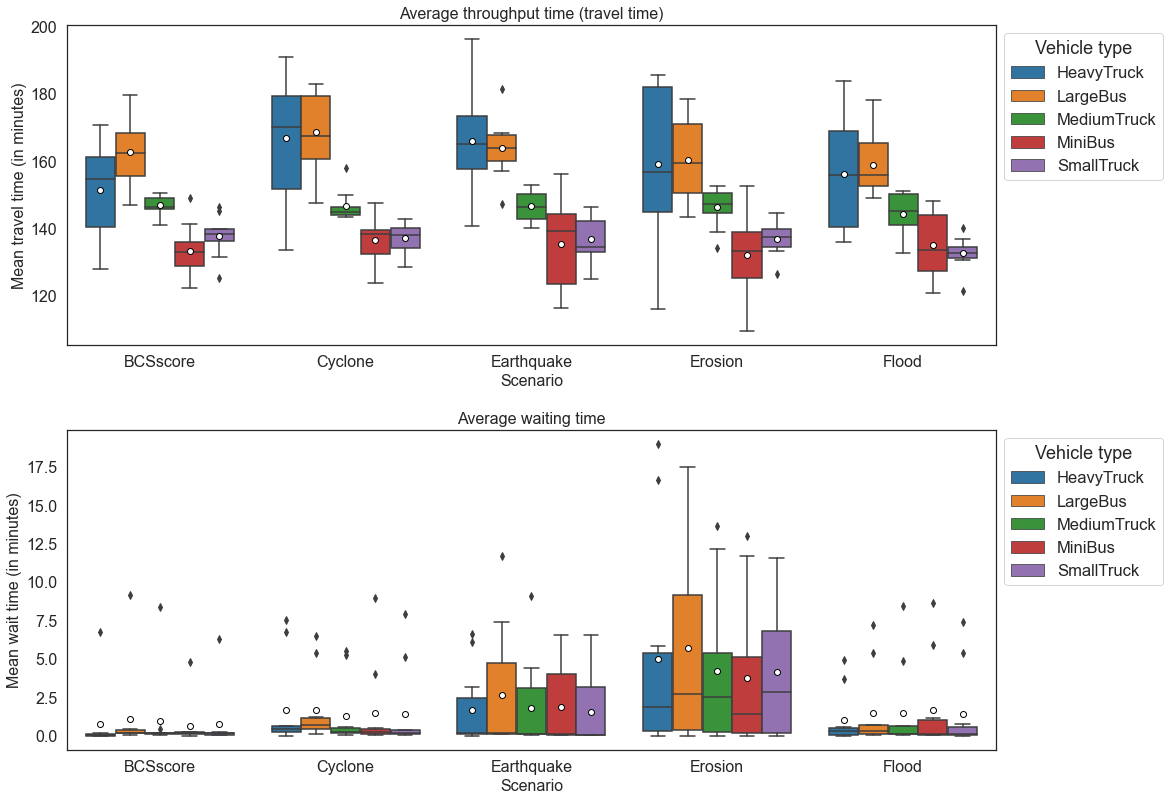

In [18]:
# Plotting the KPIs

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time)"
indicators["long_names"]["Mean wait time"] = "Average waiting time"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
f.tight_layout(pad = 3)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_baseline, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

#### Let's now check the differences within each scenario ####

**Let's now check the differences within each scenario**

In [19]:
# Checking the case of the BCS scenarios

print("Scenarios for the BCS case are: ", BCSscore_final_df['Scenario'].unique())

Scenarios for the BCS case are:  ['BCSscore_10.01' 'BCSscore_10.1' 'BCSscore_10.05' 'BCSscore_20.01'
 'BCSscore_20.1' 'BCSscore_20.05' 'BCSscore_50.01' 'BCSscore_50.1'
 'BCSscore_50.05' 'BCSscore_100.01' 'BCSscore_100.1' 'BCSscore_100.05'
 'BCSscore']


In [20]:
# Renaming the scenarios in order to have a more meaningful visualisation

BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore", "Scenario"] = 'BCS'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_10.01", "Scenario"] = 'BCS_1_0.01'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_10.1", "Scenario"] = 'BCS_1_0.1'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_10.05", "Scenario"] = 'BCS_1_0.05'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_20.01", "Scenario"] = 'BCS_2_0.01'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_20.1", "Scenario"] = 'BCS_2_0.1'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_20.1", "Scenario"] = 'BCS_2_0.1'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_20.05", "Scenario"] = 'BCS_2_0.05'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_50.01", "Scenario"] = 'BCS_5_0.01'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_50.1", "Scenario"] = 'BCS_5_0.1'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_50.05", "Scenario"] = 'BCS_5_0.05'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_100.01", "Scenario"] = 'BCS_10_0.01'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_100.1", "Scenario"] = 'BCS_10_0.1'
BCSscore_final_df.loc[BCSscore_final_df["Scenario"] == "BCSscore_100.05", "Scenario"] = 'BCS_10_0.05'

BCSscore_final_df.head()

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus15410,10,0.00,N2_LRPS,N1_LRPS,MiniBus,N2_LRPS-N1_LRPS,0,BCS_1_0.01
1,SmallTruck15456,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCS_1_0.01
2,SmallTruck15472,11,0.00,N1_LRPS,N2_LRPS,SmallTruck,N1_LRPS-N2_LRPS,0,BCS_1_0.01
3,SmallTruck15386,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,BCS_1_0.01
4,MediumTruck15512,5,0.00,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,BCS_1_0.01


In [21]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = BCSscore_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = BCSscore_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_BCS = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_BCS.set_index("Scenario")
KPIs_BCS = KPIs_BCS.set_axis(col_names, axis='columns') # renaming columns


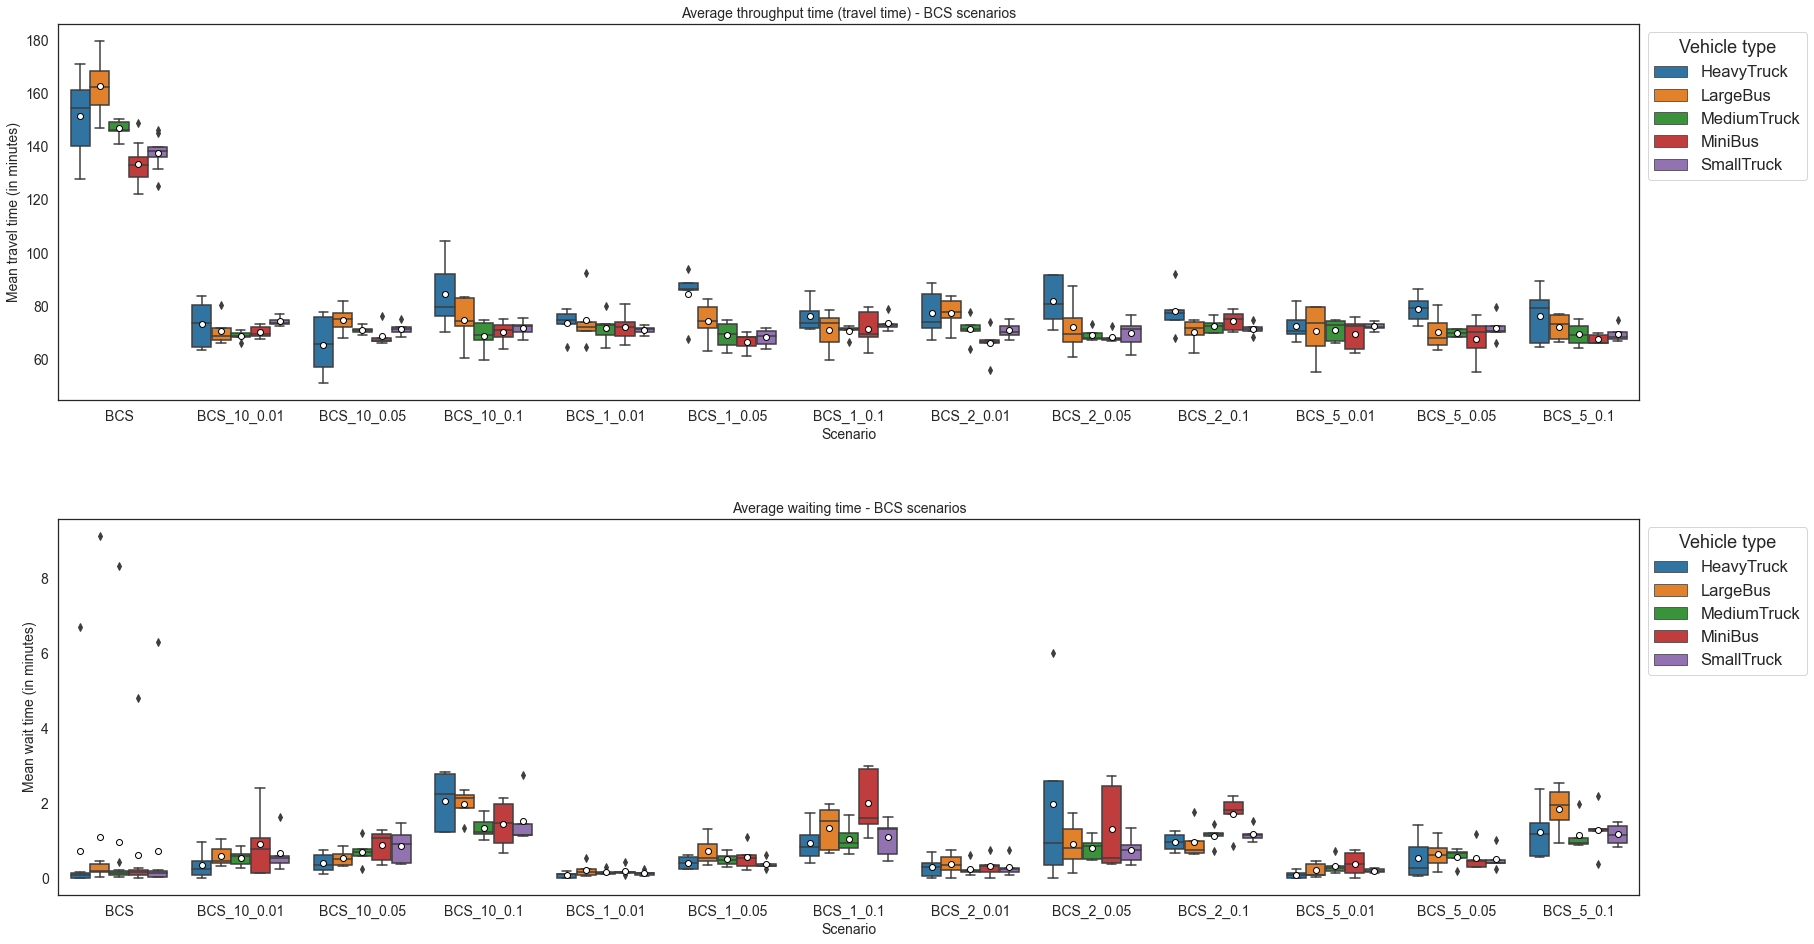

In [22]:
# Plotting the KPIs

parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time) - BCS scenarios"
indicators["long_names"]["Mean wait time"] = "Average waiting time - BCS scenarios"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))
f.tight_layout(pad = 5)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_BCS, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

In [23]:
# Checking the case of the Cyclone scenarios

print("Scenarios for the Cyclone case are: ", Cyclone_final_df['Scenario'].unique())

Scenarios for the Cyclone case are:  ['Cyclone_10.01' 'Cyclone_10.1' 'Cyclone_10.05' 'Cyclone_20.01'
 'Cyclone_20.1' 'Cyclone_20.05' 'Cyclone_50.01' 'Cyclone_50.1'
 'Cyclone_50.05' 'Cyclone_100.01' 'Cyclone_100.1' 'Cyclone_100.05'
 'Cyclone']


In [24]:
# Renaming the scenarios in order to have a more meaningful visualisation

Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone", "Scenario"] = 'Cyclone'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_10.01", "Scenario"] = 'Cyclone_1_0.01'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_10.1", "Scenario"] = 'Cyclone_1_0.1'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_10.05", "Scenario"] = 'Cyclone_1_0.05'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_20.01", "Scenario"] = 'Cyclone_2_0.01'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_20.1", "Scenario"] = 'Cyclone_2_0.1'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_20.1", "Scenario"] = 'Cyclone_2_0.1'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_20.05", "Scenario"] = 'Cyclone_2_0.05'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_50.01", "Scenario"] = 'Cyclone_5_0.01'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_50.1", "Scenario"] = 'Cyclone_5_0.1'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_50.05", "Scenario"] = 'Cyclone_5_0.05'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_100.01", "Scenario"] = 'Cyclone_10_0.01'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_100.1", "Scenario"] = 'Cyclone_10_0.1'
Cyclone_final_df.loc[Cyclone_final_df["Scenario"] == "Cyclone_100.05", "Scenario"] = 'Cyclone_10_0.05'

Cyclone_final_df.head()

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus7680,10,0.00,N1_LRPS,N2_LRPS,MiniBus,N1_LRPS-N2_LRPS,0,Cyclone_1_0.01
1,SmallTruck7714,5,0.16,N2_LRPS,N105_LRPS,SmallTruck,N2_LRPS-N105_LRPS,0,Cyclone_1_0.01
2,MediumTruck7730,6,1.17,N2_LRPS,N105_LRPS,MediumTruck,N2_LRPS-N105_LRPS,0,Cyclone_1_0.01
3,MediumTruck7784,5,0.46,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Cyclone_1_0.01
4,SmallTruck7691,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,0,Cyclone_1_0.01


In [25]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = Cyclone_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = Cyclone_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_Cyclone = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_Cyclone.set_index("Scenario")
KPIs_Cyclone = KPIs_Cyclone.set_axis(col_names, axis='columns') # renaming columns

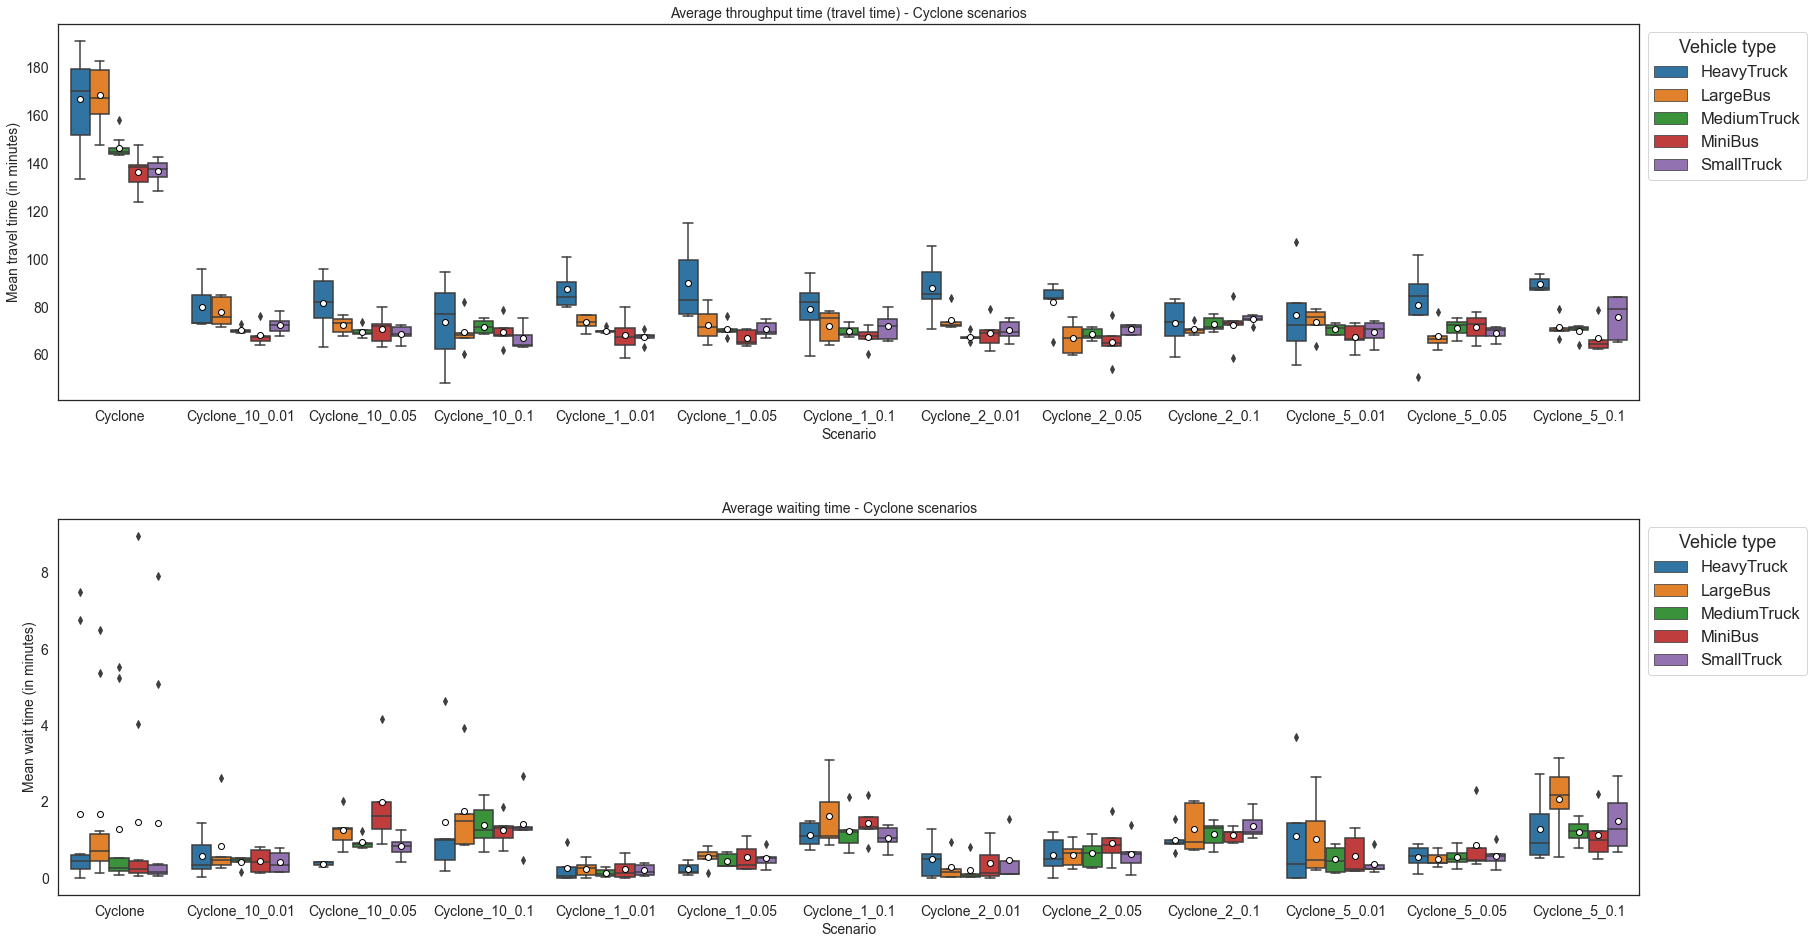

In [26]:
# Plotting the KPIs

parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time) - Cyclone scenarios"
indicators["long_names"]["Mean wait time"] = "Average waiting time - Cyclone scenarios"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))
f.tight_layout(pad = 5)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_Cyclone, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

In [27]:
# Checking the case of the Earthquake scenarios

print("Scenarios for the Cyclone case are: ", Earthquake_final_df['Scenario'].unique())

Scenarios for the Cyclone case are:  ['Earthquake_10.01' 'Earthquake_10.1' 'Earthquake_10.05'
 'Earthquake_20.01' 'Earthquake_20.1' 'Earthquake_20.05'
 'Earthquake_50.01' 'Earthquake_50.1' 'Earthquake_50.05'
 'Earthquake_100.01' 'Earthquake_100.1' 'Earthquake_100.05' 'Earthquake']


In [28]:
# Renaming the scenarios in order to have a more meaningful visualisation

Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake", "Scenario"] = 'Earthquake'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_10.01", "Scenario"] = 'Earthquake_1_0.01'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_10.1", "Scenario"] = 'Earthquake_1_0.1'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_10.05", "Scenario"] = 'Earthquake_1_0.05'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_20.01", "Scenario"] = 'Earthquake_2_0.01'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_20.1", "Scenario"] = 'Earthquake_2_0.1'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_20.1", "Scenario"] = 'Earthquake_2_0.1'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_20.05", "Scenario"] = 'Earthquake_2_0.05'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_50.01", "Scenario"] = 'Earthquake_5_0.01'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_50.1", "Scenario"] = 'Earthquake_5_0.1'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_50.05", "Scenario"] = 'Earthquake_5_0.05'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_100.01", "Scenario"] = 'Earthquake_10_0.01'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_100.1", "Scenario"] = 'Earthquake_10_0.1'
Earthquake_final_df.loc[Earthquake_final_df["Scenario"] == "Earthquake_100.05", "Scenario"] = 'Earthquake_10_0.05'

Earthquake_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MiniBus2,4,0.00,N2_LRPS,N105_LRPS,MiniBus,N2_LRPS-N105_LRPS,0,Earthquake_1_0.01
1,LargeBus48,10,0.00,N1_LRPS,N2_LRPS,LargeBus,N1_LRPS-N2_LRPS,0,Earthquake_1_0.01
2,MediumTruck104,5,0.00,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Earthquake_1_0.01
3,SmallTruck10,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,Earthquake_1_0.01
4,MediumTruck11,43,0.00,N204_LRPE,N204_LRPS,MediumTruck,N204_LRPE-N204_LRPS,0,Earthquake_1_0.01
...,...,...,...,...,...,...,...,...,...
16060,SmallTruck22907,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,9,Earthquake
16061,MediumTruck22107,294,105.18,N204_LRPE,N105_LRPS,MediumTruck,N204_LRPE-N105_LRPS,9,Earthquake
16062,SmallTruck22780,84,0.00,N207_LRPS,N207_LRPE,SmallTruck,N207_LRPS-N207_LRPE,9,Earthquake
16063,MediumTruck22781,84,0.00,N207_LRPE,N207_LRPS,MediumTruck,N207_LRPE-N207_LRPS,9,Earthquake


In [29]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = Earthquake_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = Earthquake_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_Earthquake = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_Earthquake.set_index("Scenario")
KPIs_Earthquake = KPIs_Earthquake.set_axis(col_names, axis='columns') # renaming columns

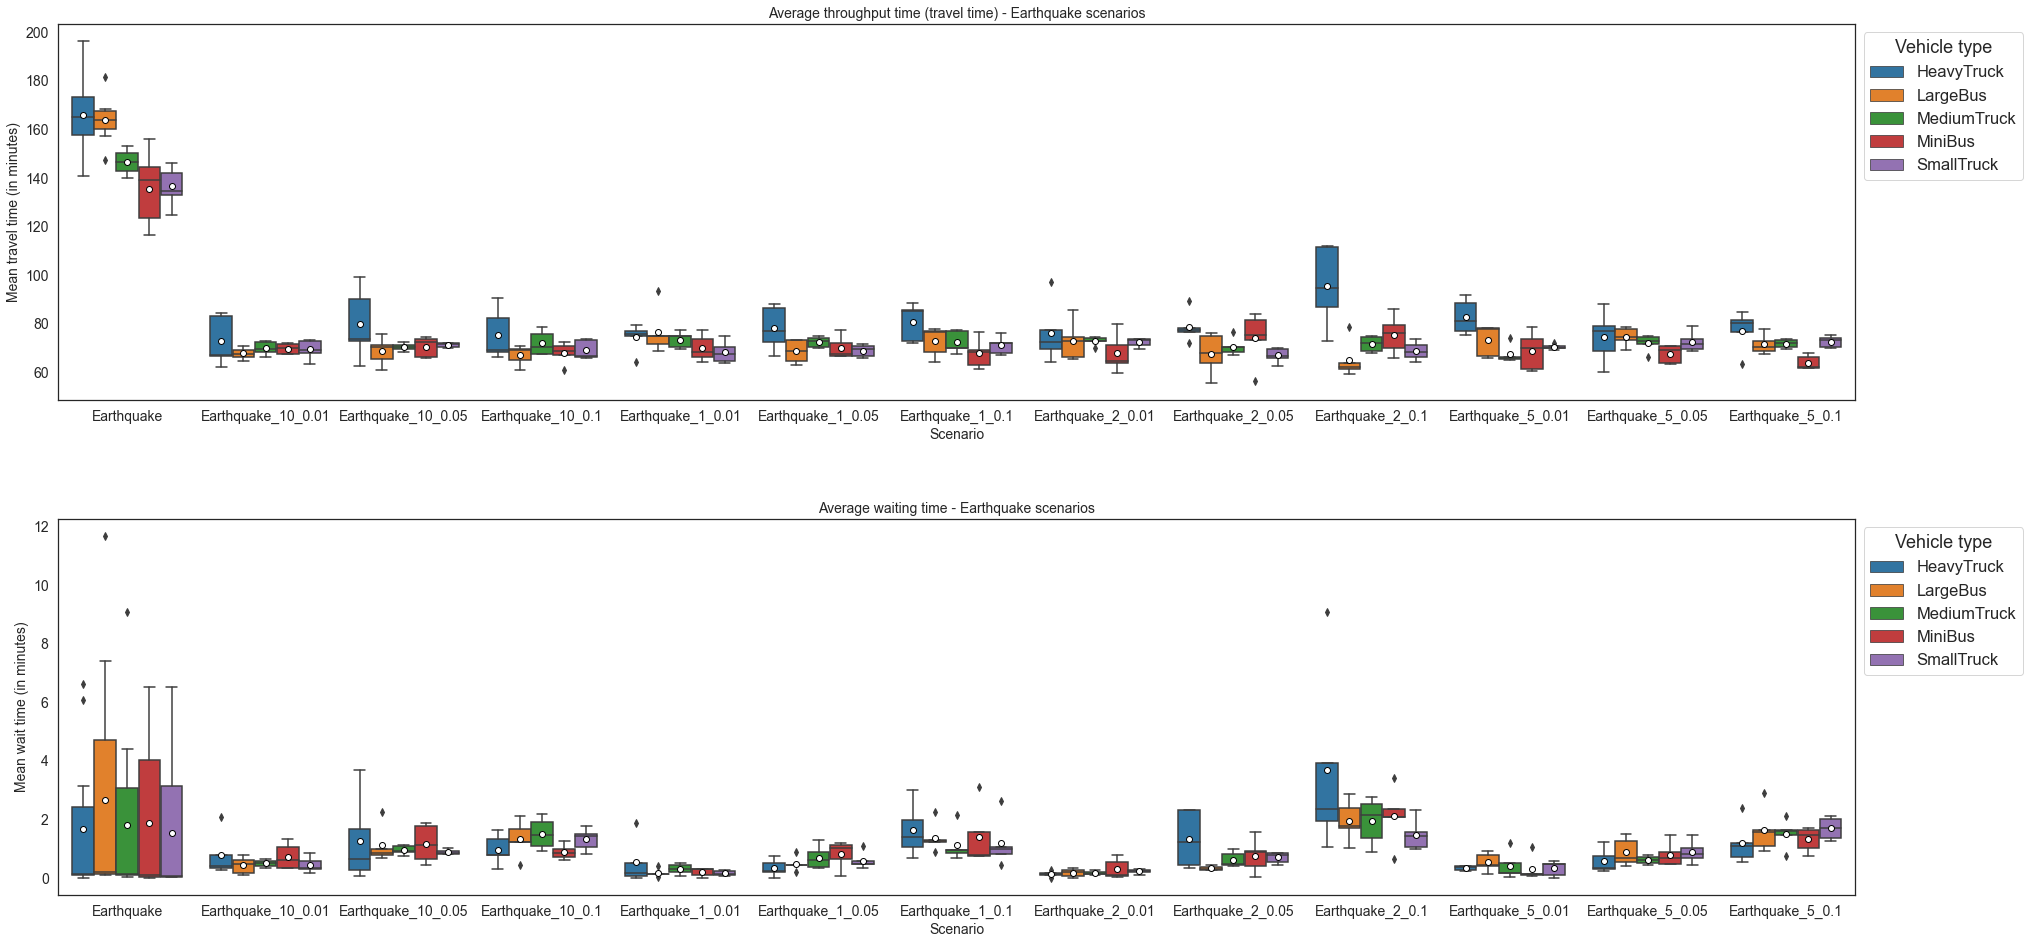

In [30]:
# Plotting the KPIs

parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time) - Earthquake scenarios"
indicators["long_names"]["Mean wait time"] = "Average waiting time - Earthquake scenarios"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(28, 15))
f.tight_layout(pad = 5)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_Earthquake, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

In [31]:
# Checking the case of the Erosion scenarios

print("Scenarios for the Cyclone case are: ", Erosion_final_df['Scenario'].unique())

Scenarios for the Cyclone case are:  ['Erosion_10.01' 'Erosion_10.1' 'Erosion_10.05' 'Erosion_20.01'
 'Erosion_20.1' 'Erosion_20.05' 'Erosion_50.01' 'Erosion_50.1'
 'Erosion_50.05' 'Erosion_100.01' 'Erosion_100.1' 'Erosion_100.05'
 'Erosion']


In [32]:
# Renaming the scenarios in order to have a more meaningful visualisation

Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion", "Scenario"] = 'Erosion'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_10.01", "Scenario"] = 'Erosion_1_0.01'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_10.1", "Scenario"] = 'Erosion_1_0.1'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_10.05", "Scenario"] = 'Erosion_1_0.05'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_20.01", "Scenario"] = 'Erosion_2_0.01'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_20.1", "Scenario"] = 'Erosion_2_0.1'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_20.1", "Scenario"] = 'Erosion_2_0.1'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_20.05", "Scenario"] = 'Erosion_2_0.05'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_50.01", "Scenario"] = 'Erosion_5_0.01'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_50.1", "Scenario"] = 'Erosion_5_0.1'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_50.05", "Scenario"] = 'Erosion_5_0.05'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_100.01", "Scenario"] = 'Erosion_10_0.01'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_100.1", "Scenario"] = 'Erosion_10_0.1'
Erosion_final_df.loc[Erosion_final_df["Scenario"] == "Erosion_100.05", "Scenario"] = 'Erosion_10_0.05'

Erosion_final_df

,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MediumTruck3906,5,0.00,N2_LRPS,N105_LRPS,MediumTruck,N2_LRPS-N105_LRPS,0,Erosion_1_0.01
1,MediumTruck3904,15,0.00,N1_LRPS,N105_LRPS,MediumTruck,N1_LRPS-N105_LRPS,0,Erosion_1_0.01
2,MiniBus3866,34,0.00,N204_LRPS,N207_LRPS,MiniBus,N204_LRPS-N207_LRPS,0,Erosion_1_0.01
3,LargeBus3954,4,0.00,N2_LRPS,N105_LRPS,LargeBus,N2_LRPS-N105_LRPS,0,Erosion_1_0.01
4,SmallTruck3850,43,0.00,N204_LRPS,N204_LRPE,SmallTruck,N204_LRPS-N204_LRPE,0,Erosion_1_0.01
...,...,...,...,...,...,...,...,...,...
15862,MediumTruck45749,102,0.00,N102_LRPE,N102_LRPS,MediumTruck,N102_LRPE-N102_LRPS,9,Erosion
15863,MediumTruck45647,138,0.00,N208_LRPE,N204_LRPS,MediumTruck,N208_LRPE-N204_LRPS,9,Erosion
15864,MediumTruck45946,43,0.00,N204_LRPS,N204_LRPE,MediumTruck,N204_LRPS-N204_LRPE,9,Erosion
15865,MiniBus45520,174,0.00,N1_LRPS,N207_LRPS,MiniBus,N1_LRPS-N207_LRPS,9,Erosion


In [33]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = Erosion_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = Erosion_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_Erosion = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_Erosion.set_index("Scenario")
KPIs_Erosion = KPIs_Erosion.set_axis(col_names, axis='columns') # renaming columns

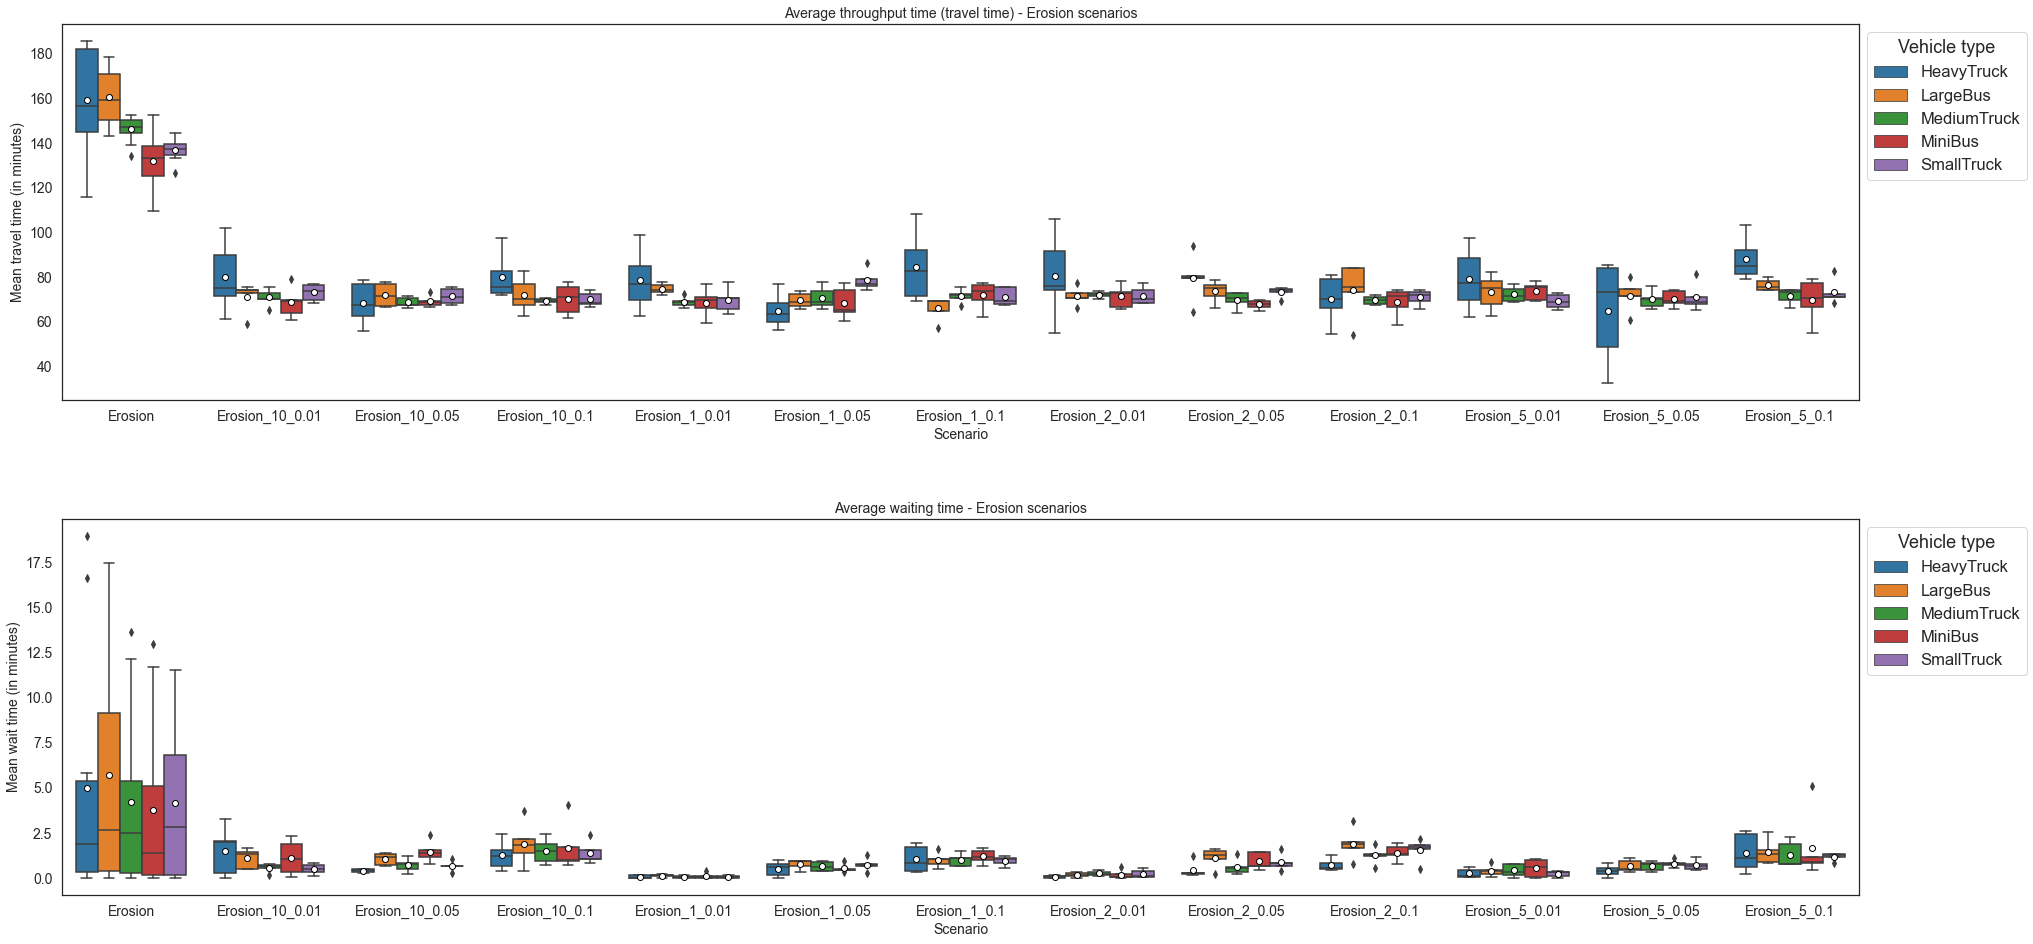

In [34]:
# Plotting the KPIs

parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time) - Erosion scenarios"
indicators["long_names"]["Mean wait time"] = "Average waiting time - Erosion scenarios"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(28, 15))
f.tight_layout(pad = 5)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_Erosion, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

In [35]:
# Checking the case of the Flood scenarios

print("Scenarios for the Cyclone case are: ", Flood_final_df['Scenario'].unique())

Scenarios for the Cyclone case are:  ['Flood_10.01' 'Flood_10.1' 'Flood_10.05' 'Flood_20.01' 'Flood_20.1'
 'Flood_20.05' 'Flood_50.01' 'Flood_50.1' 'Flood_50.05' 'Flood_100.01'
 'Flood_100.1' 'Flood_100.05' 'Flood']


In [36]:
# Renaming the scenarios in order to have a more meaningful visualisation

Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood", "Scenario"] = 'Flood'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_10.01", "Scenario"] = 'Flood_1_0.01'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_10.1", "Scenario"] = 'Flood_1_0.1'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_10.05", "Scenario"] = 'Flood_1_0.05'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_20.01", "Scenario"] = 'Flood_2_0.01'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_20.1", "Scenario"] = 'Flood_2_0.1'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_20.1", "Scenario"] = 'Flood_2_0.1'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_20.05", "Scenario"] = 'Flood_2_0.05'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_50.01", "Scenario"] = 'Flood_5_0.01'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_50.1", "Scenario"] = 'Flood_5_0.1'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_50.05", "Scenario"] = 'Flood_5_0.05'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_100.01", "Scenario"] = 'Flood_10_0.01'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_100.1", "Scenario"] = 'Flood_10_0.1'
Flood_final_df.loc[Flood_final_df["Scenario"] == "Flood_100.05", "Scenario"] = 'Flood_10_0.05'

Flood_final_df



,Truck id,Travel time,Total waiting time,Created at,Removed at,Type,Path,Replication,Scenario
0,MediumTruck11592,5,0.16,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Flood_1_0.01
1,MediumTruck11608,5,0.18,N105_LRPS,N2_LRPS,MediumTruck,N105_LRPS-N2_LRPS,0,Flood_1_0.01
2,MediumTruck11584,16,0.36,N1_LRPS,N105_LRPS,MediumTruck,N1_LRPS-N105_LRPS,0,Flood_1_0.01
3,MediumTruck11530,43,0.00,N204_LRPS,N204_LRPE,MediumTruck,N204_LRPS-N204_LRPE,0,Flood_1_0.01
4,SmallTruck11531,43,0.00,N204_LRPE,N204_LRPS,SmallTruck,N204_LRPE-N204_LRPS,0,Flood_1_0.01
...,...,...,...,...,...,...,...,...,...
16085,HeavyTruck44946,353,0.00,N2_LRPS,N2_LRPE,HeavyTruck,N2_LRPS-N2_LRPE,9,Flood
16086,MediumTruck45367,223,0.00,N104_LRPE,N105_LRPS,MediumTruck,N104_LRPE-N105_LRPS,9,Flood
16087,SmallTruck44790,404,0.00,N104_LRPS,N207_LRPE,SmallTruck,N104_LRPS-N207_LRPE,9,Flood
16088,MediumTruck45820,84,0.00,N207_LRPS,N207_LRPE,MediumTruck,N207_LRPS-N207_LRPE,9,Flood


In [37]:
# computing mean travel time considering the scenario granularity

mean_travel_time_scenario = Flood_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Travel time'].mean()
mean_wait_time_scenario = Flood_final_df.groupby(['Scenario','Type','Replication'], as_index=False)['Total waiting time'].mean()

# merging the dataframes

col_names = ['Scenario','Vehicle type','Replication','Mean travel time', 'Mean wait time']
KPIs_Flood = pd.merge(mean_travel_time_scenario,mean_wait_time_scenario)
KPIs_Flood.set_index("Scenario")
KPIs_Flood = KPIs_Flood.set_axis(col_names, axis='columns') # renaming columns

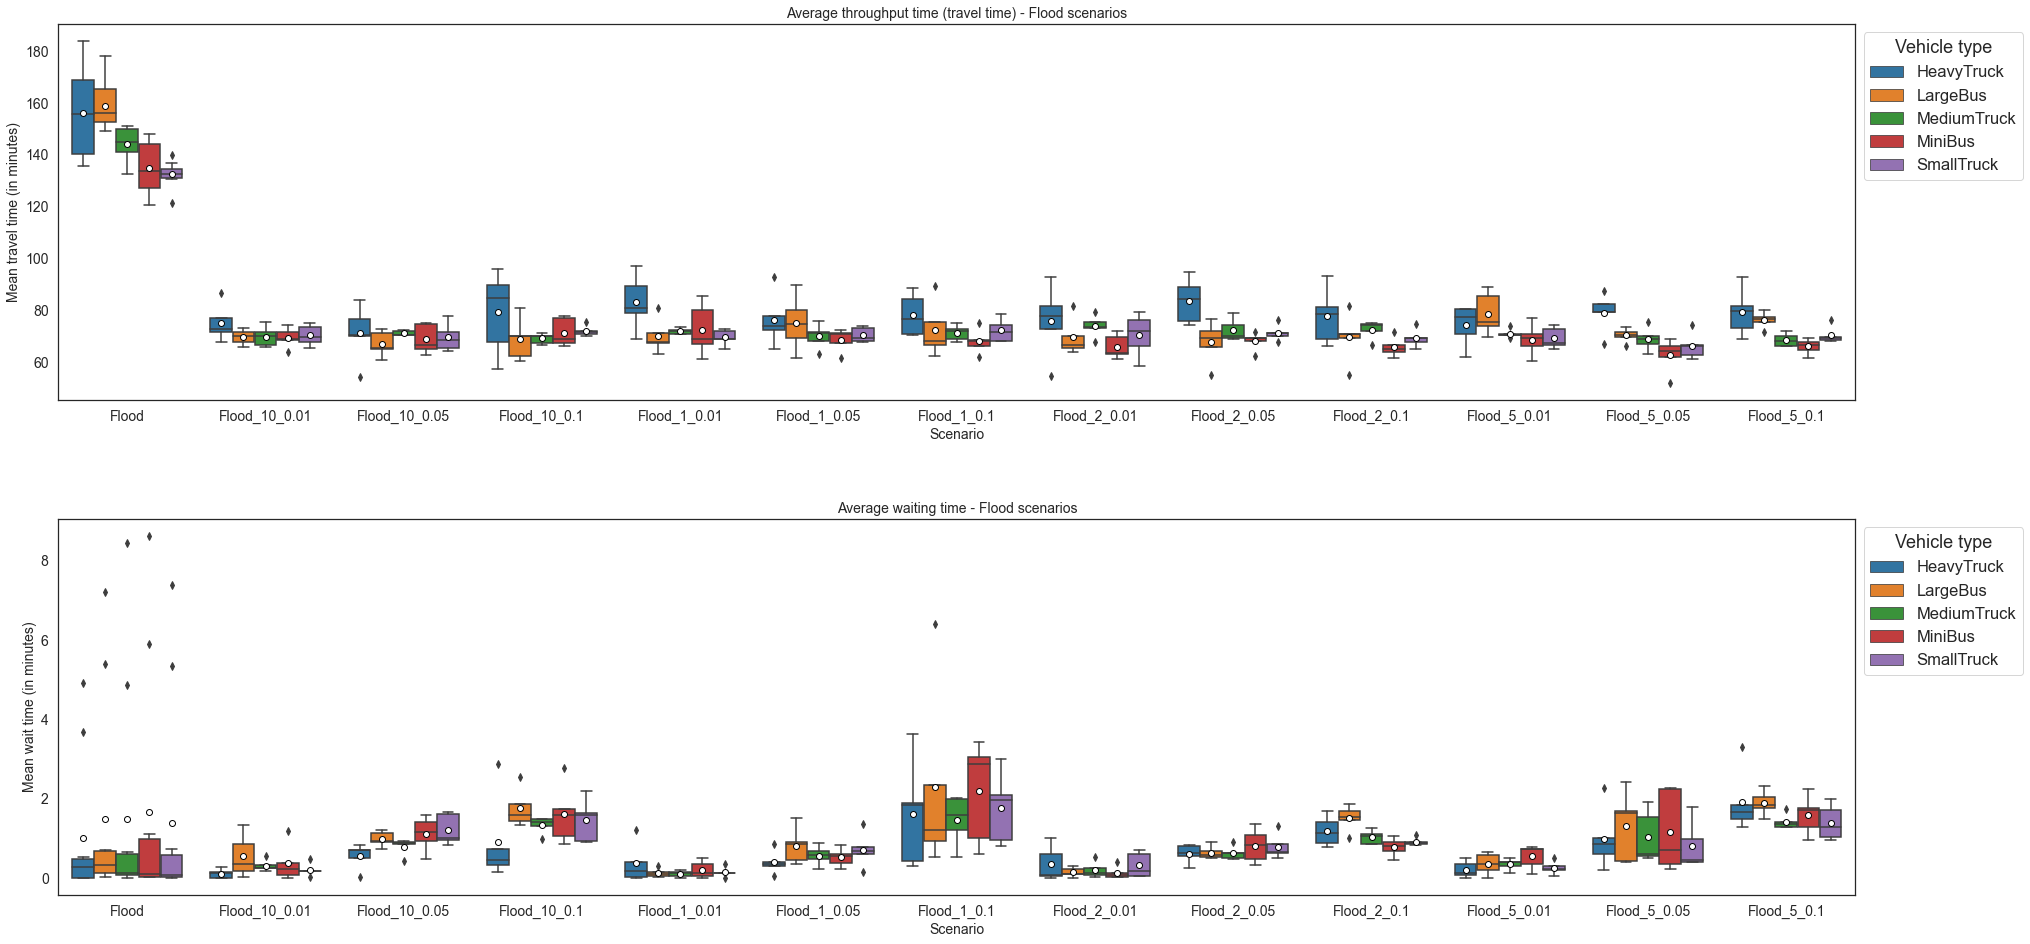

In [38]:
# Plotting the KPIs

parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(parameters)

indicators = {}
indicators["long_names"] = {}
indicators["long_names"]["Mean travel time"] = "Average throughput time (travel time) - Flood scenarios"
indicators["long_names"]["Mean wait time"] = "Average waiting time - Flood scenarios"


cols_interest = ['Mean travel time', 'Mean wait time']

# Create figure and axes
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(28, 15))
f.tight_layout(pad = 5)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(cols_interest):
    # select the axis
    ax = axs[i]
    # Plot the boxplot
    
    sns.boxplot(x="Scenario", y=col, palette = "tab10", hue = "Vehicle type", data=KPIs_Flood, ax = ax,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"}) 
    ax.set_title(indicators["long_names"][col])
    ax.set_ylabel(col + ' (in minutes)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display the figure
plt.show()

### Analysis of Criticallity and Vulnerability

**Analysing criticality of bridges**

In [39]:
# Getting all the files with information regarding total wait time on bridges and total number of trucks that went through bridges

# For every scenario, we call the 'get_files' function to append all the replication files in a list
Bridges_files = get_files('*BCSscore_replication*_waiting_time.csv')
Bridges_df=read_files_waiting_time(Bridges_files)

In [40]:
Bridges_df.head()

,Truck id,Bridge id,Waiting time,Type
0,SmallTruck6,N104_LRPSa,0.00,SmallTruck
1,LargeBus10,N2_LRP117b,0.00,LargeBus
2,LargeBus10,N2_LRP117a,0.00,LargeBus
3,SmallTruck4,N102_LRPSc,0.00,SmallTruck
4,MediumTruck5,N102_LRP082a,0.00,MediumTruck


In [41]:
# Check throughput of bridges

bridges_throughput = Bridges_df.groupby(['Bridge id','Type'], as_index=False)['Truck id'].count().sort_values(["Bridge id","Truck id"],ascending=False)
bridges_throughput


,Bridge id,Type,Truck id
3637,N2_LRP285c,MediumTruck,885
3636,N2_LRP285c,LargeBus,510
3639,N2_LRP285c,SmallTruck,404
3638,N2_LRP285c,MiniBus,230
3635,N2_LRP285c,HeavyTruck,103
...,...,...,...
2,N102_LRP002a,MediumTruck,974
4,N102_LRP002a,SmallTruck,591
1,N102_LRP002a,LargeBus,422
0,N102_LRP002a,HeavyTruck,166


In [42]:
# adding information about the products capacity each vehicle can carry

bridges_throughput.loc[bridges_throughput["Type"] == "MediumTruck", "Weight of goods (WG) [Kg]"] = 10770
bridges_throughput.loc[bridges_throughput["Type"] == "LargeBus", "Weight of goods (WG) [Kg]"] = 2720
bridges_throughput.loc[bridges_throughput["Type"] == "SmallTruck", "Weight of goods (WG) [Kg]"] = 3720
bridges_throughput.loc[bridges_throughput["Type"] == "MiniBus", "Weight of goods (WG) [Kg]"] = 2144
bridges_throughput.loc[bridges_throughput["Type"] == "HeavyTruck", "Weight of goods (WG) [Kg]"] = 18700

# calculating the total load that passed through each bridge

bridges_throughput["Total load [in 100,000 Kg]"] = bridges_throughput["Truck id"] * bridges_throughput["Weight of goods (WG) [Kg]"]/100000 

bridges_throughput = bridges_throughput.sort_values(["Total load [in 100,000 Kg]"],ascending=False)

In [43]:
bridges_throughput.head()

,Bridge id,Type,Truck id,Weight of goods (WG) [Kg],"Total load [in 100,000 Kg]"
2307,N2_LRP012f,MediumTruck,2414,"10,770.00",259.99
2312,N2_LRP016a,MediumTruck,2413,"10,770.00",259.88
2327,N2_LRP021b,MediumTruck,2413,"10,770.00",259.88
2302,N2_LRP012c,MediumTruck,2412,"10,770.00",259.77
2317,N2_LRP018a,MediumTruck,2412,"10,770.00",259.77


**Analysing vulnerability of bridges**

In [44]:
# Reading vulnerability scores file
vulnerability_file_directory = '../data/'
vulnerability_file = 'bridges-scores.xlsx'

file_path = os.path.join(vulnerability_file_directory,vulnerability_file)
vulnerability_df = pd.read_excel(file_path)


# keeping only necessary columns
vulnerability_df = vulnerability_df.loc[:,['id','AggregatedScoreNormalized']]
vulnerability_df = vulnerability_df.rename(columns={ vulnerability_df.columns[1]: "Aggregated Vulnerability Score" })
vulnerability_df = vulnerability_df.rename(columns={ vulnerability_df.columns[0]: "Bridge id" })

# checking structure of dataframe
vulnerability_df.head()


,Bridge id,Aggregated Vulnerability Score
0,N1_LRP001a,0.00
1,N1_LRP004b,0.00
2,N1_LRP010b,0.00
3,N1_LRP010c,0.00
4,N1_LRP011a,0.00


Merging the information about criticality and vulnerability into the same dataframe

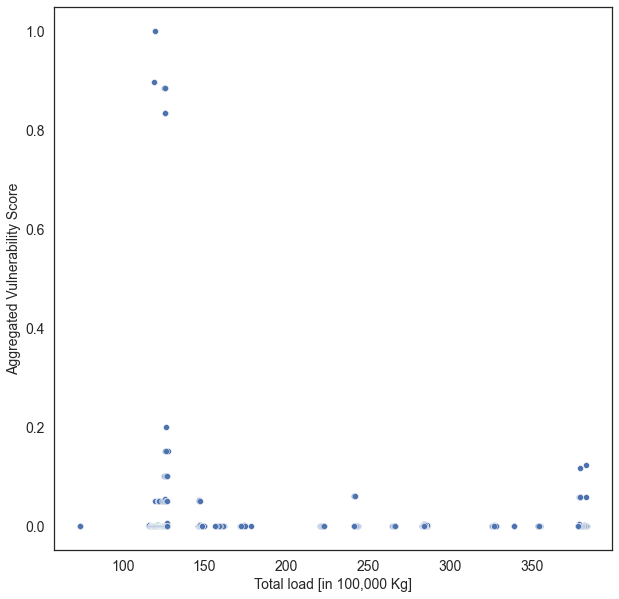

In [45]:
criticality_vulnerability_df = pd.merge(bridges_throughput,vulnerability_df[['Bridge id', 'Aggregated Vulnerability Score']], on='Bridge id')
aggregate_criticality = criticality_vulnerability_df.groupby(['Bridge id'], as_index=False)['Total load [in 100,000 Kg]'].sum() # aggregating data for the criticality
aggregate_vulnerability = criticality_vulnerability_df.groupby(['Bridge id'], as_index=False)['Aggregated Vulnerability Score'].mean() # aggregating data for the vulnerability
criticality_vulnerability_df = pd.merge(aggregate_criticality,aggregate_vulnerability[['Bridge id', 'Aggregated Vulnerability Score']], on='Bridge id') # updating dataframe


# plotting the criticality versus vulnerability scatterplot
sns.scatterplot(data=criticality_vulnerability_df, x="Total load [in 100,000 Kg]", y="Aggregated Vulnerability Score",palette = "tab10");

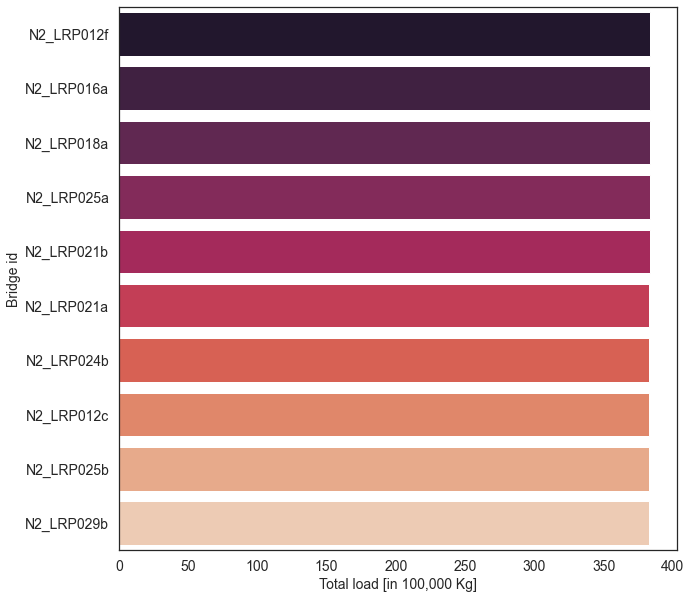

In [46]:
# Top 10 most critical bridges
top10_criticality = criticality_vulnerability_df.sort_values(["Total load [in 100,000 Kg]"],ascending=False).head(10)
ax = sns.barplot(x="Total load [in 100,000 Kg]", y="Bridge id", data=top10_criticality, palette="rocket")


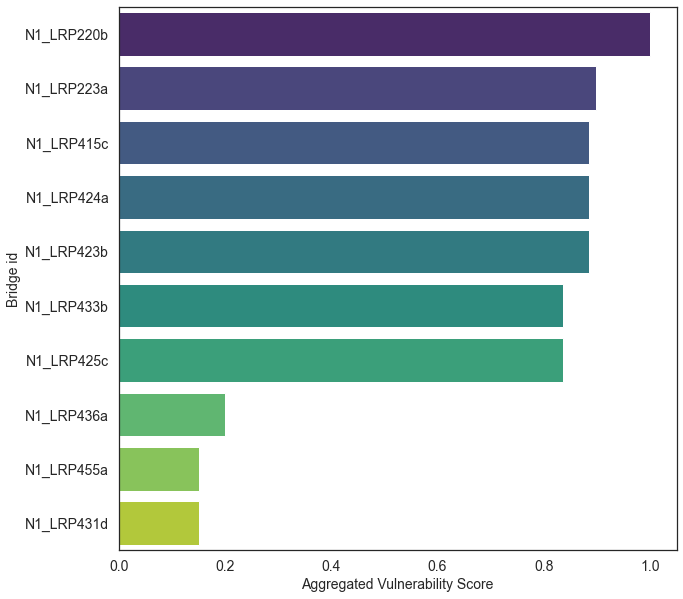

In [47]:
# Top 10 most vulnerable bridges
top10_vulnerability = criticality_vulnerability_df.sort_values(["Aggregated Vulnerability Score"],ascending=False).head(10)
ax = sns.barplot(x="Aggregated Vulnerability Score", y="Bridge id", data=top10_vulnerability, palette="viridis")

In [48]:
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 42.09287714958191 seconds ---
